In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%run ./scripts/util_func.py
%run ./scripts/model_func.py

In [3]:
# import arrays

icp_states = np.load('data/icp_states.npy') # [time, icp_index, icp_x, icp_y, icp_yaw]
wheel_vels = np.load('data/wheel_vels.npy') # [time, icp_index, vel_l, vel_r]


In [4]:
# compute diff-drive estimates

r = 0.3 # wheel radius : meters
B = 1.2 # wheel baseline : meters
k = np.array([r, B])

dd_pose = icp_states[0,2:]

disp = 0.0
propa_mat = np.array([[np.sin(icp_states[0,2]), 0.0, 0.0], [0.0, np.cos(icp_states[0,3]), 0.0], [0.0, 0.0, 1.0]])

err = np.zeros((int(icp_states[-1, 1]), 3))
for i in range(err.shape[0]):
    err[i,0] = i

dd_vel = np.zeros((icp_states.shape[0], 3))

for i in range(icp_states.shape[0] - 1):
    dt = icp_states[i+1, 0] - icp_states[i, 0]
    disp = comp_disp(icp_states[i+1, 2:3], icp_states[i, 2:3])
    propa_mat[0,0] = np.sin(icp_states[i,2])
    propa_mat[1,1] = np.cos(icp_states[i,3])
    
    dd_pose += propa_mat @ diff_drive(wheel_vels[i, 2:], k) * dt
    
    if icp_states[i+1,1] != icp_states[i,1]:
        err[int(icp_states[i,1]), 1] = disp_err(dd_pose, icp_states[i+1, 2:])
        err[int(icp_states[i,1]), 2] = disp
        dd_pose = icp_states[i+1, 2:]
    
print(err)
    

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 6.23756298e-01 1.42270327e-03]
 ...
 [8.71600000e+03 5.25832083e+01 1.02519989e-05]
 [8.71700000e+03 5.25921490e+01 2.42447853e-03]
 [8.71800000e+03 5.25931079e+01 2.23994255e-03]]


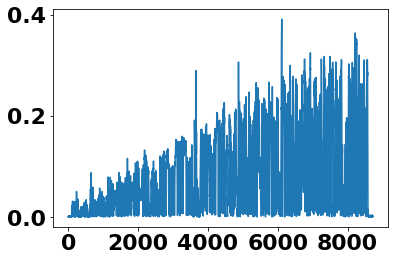

In [11]:
plt.plot(err[:,0], err[:, 2])